# Prática VI

Eduardo Garcia Misiuk - 9293230

Mauricio Caetano da Silva - 9040996

Dataset escolhido: Titanic

## Função de Classificação

In [2]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

def classificacao(data, columns, target, score=accuracy_score, score_name='acurácia', 
                  folds=10, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    #svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'dt', '3nn', '5nn', '7nn']
    # valores para gerar a matriz de confusão
    cm = {'perceptron_pred': [], 'perceptron_true': [],
          'dt_pred': [], 'dt_true': [],
          '3nn_pred': [], '3nn_true': [],
          '5nn_pred': [], '5nn_true': [],
          '7nn_pred': [], '7nn_true': []}
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            cm[c_name + '_pred'] = y_pred
            cm[c_name + '_true'] = y_test
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
    
    if not plot:
        return {'results': results, 'clfs':clfs, 'cm':cm}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'cm':cm}

## Carregando os dados

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

att = ['Survived','Pclass','Age','SibSp','Parch','Fare']
titanic = pd.read_csv('titanic.csv', usecols=att)

separator = "\n============================================================================================================\n"
columns = titanic.columns.tolist()

titanic.head(n=10)



,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,NaN,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


### Questão 1)

Realizar 10-fold Cross-Validation nos algoritmos da prática passada utilizando as métricas vista na aula de hoje (acuácia, precisão, revocação, sensitividade, especificidade, medida-F e média harmônica). Comentar se no seu cenário alguma dessa medidas apresentou algum problema, ex. se o dataset é muito desbalanceado e a acurácia retornou um valor próximo da proporção de classes significa que ela não é muito boa para julgar o desempenho do classificador nesse caso; comente sobre esses problemas para cada medida, leve em conta o desempenho dos classificadores, por ex. se todos os classificadores tiveram um desempenho ruim pode significar que a métrica não é adequada para esse cenário, ou pode ser apenas que esses classificadores que não são adequados, comente sobre isso.

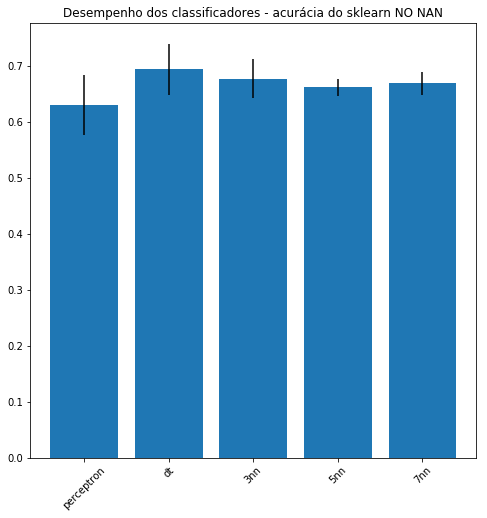

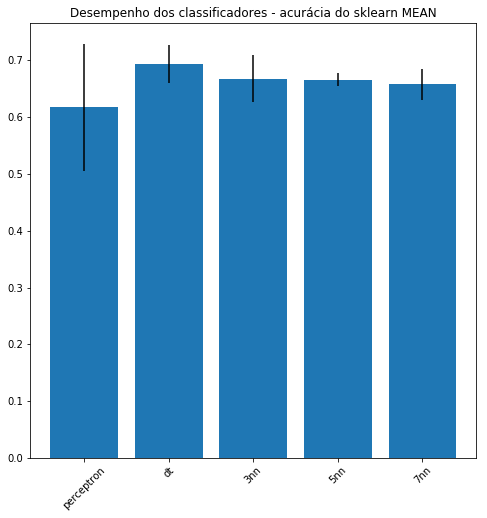

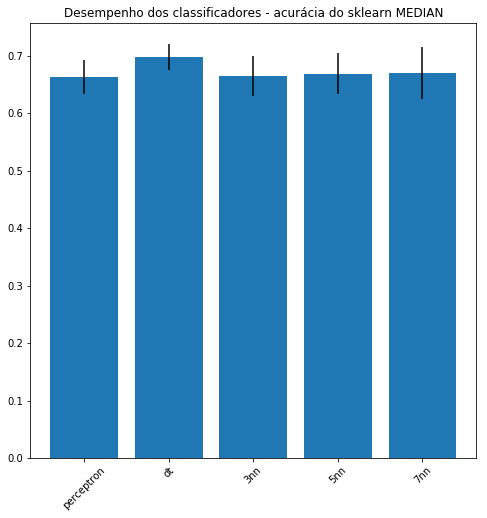

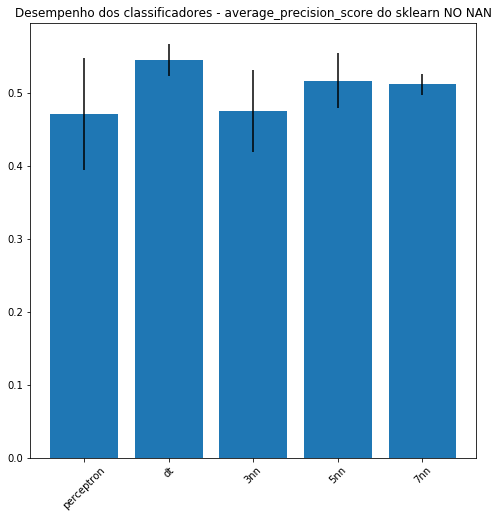

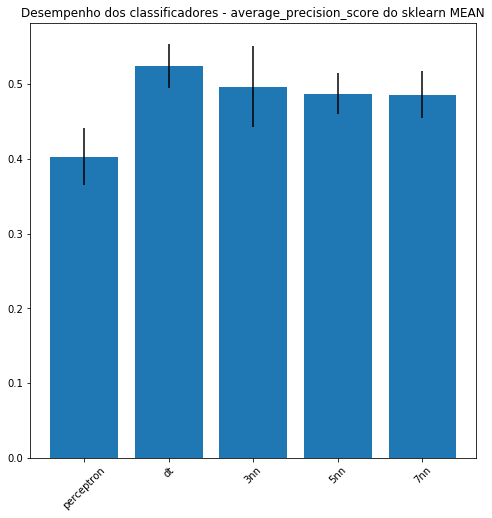

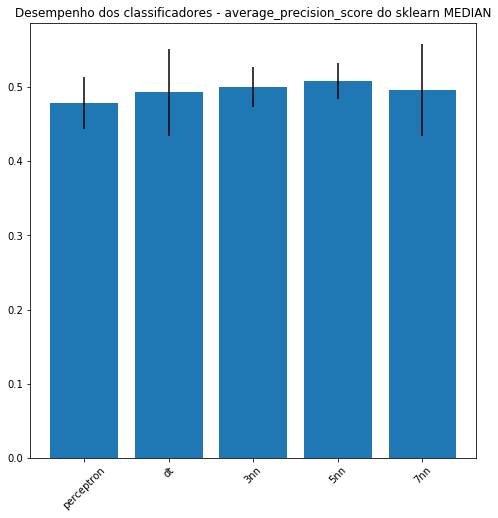

C:\Users\Eduardo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


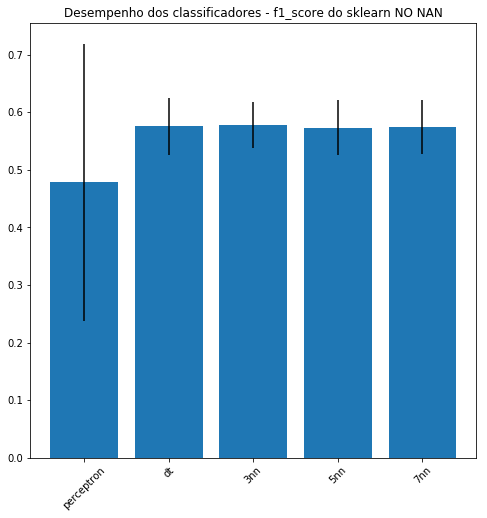

C:\Users\Eduardo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


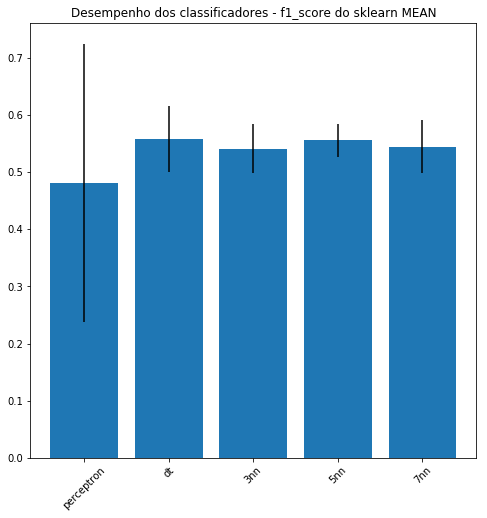

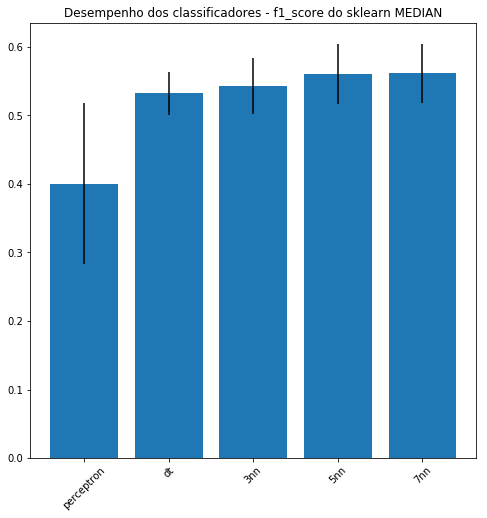

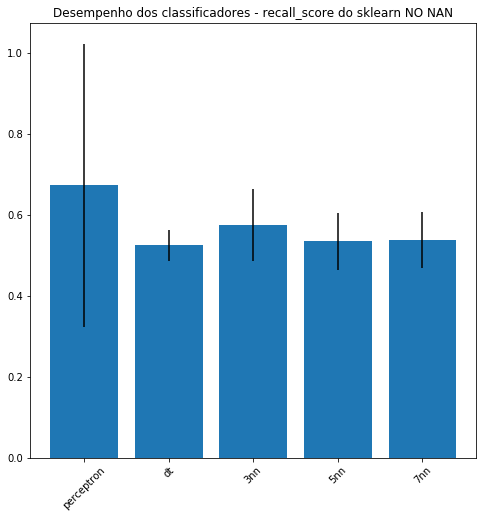

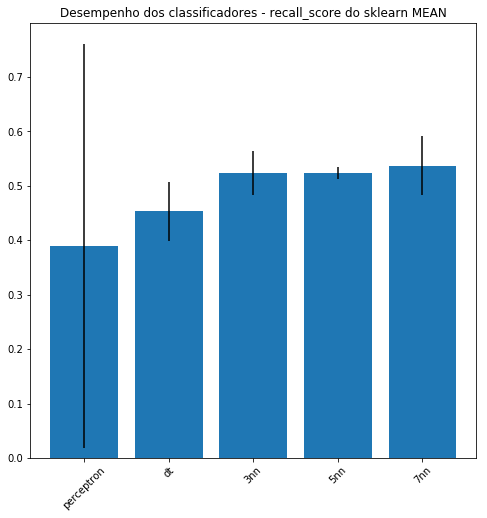

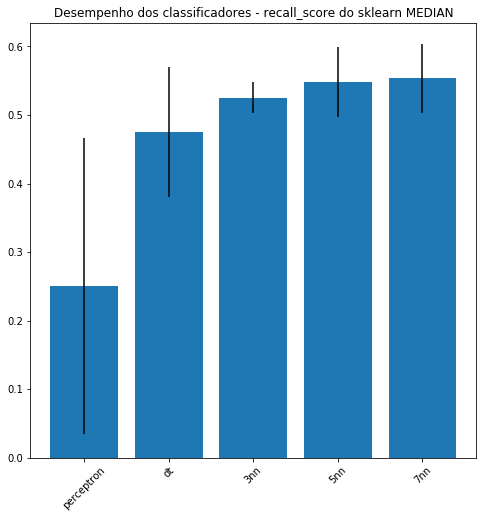

In [4]:
import seaborn as sns

# Coluna de interesse "Survived"
target = 0
# Cria um array com o número das demais colunas 1 - 5
columns_num = list(range(1,len(columns)))

# Importa as funções de medida de desempenho
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# O classificador não funciona com valores NaN no dataframe, então, estes devem ser eliminados
# Dataframe sem os valores NaN
clean = titanic.dropna()

# Dataframe com os valores NaN substituídos pela média
clean_mean = titanic.copy()
clean_mean.fillna(value=titanic.mean(), axis=0, inplace=True)

# Dataframe com os valores NaN substituídos pela mediana
clean_median = titanic.copy()
clean_median.fillna(value=titanic.median(), axis=0, inplace=True)

# Acurácia
clf_acc_clean = classificacao(clean, columns_num, target, accuracy_score, 'acurácia do sklearn NO NAN')
clf_acc_mean = classificacao(clean_mean, columns_num, target, accuracy_score, 'acurácia do sklearn MEAN')
clf_acc_median = classificacao(clean_median, columns_num, target, accuracy_score, 'acurácia do sklearn MEDIAN')

# Precisão
clf_avg_prec_clean = classificacao(clean, columns_num, target, average_precision_score, 'average_precision_score do sklearn NO NAN')
clf_avg_prec_mean = classificacao(clean_mean, columns_num, target, average_precision_score, 'average_precision_score do sklearn MEAN')
clf_avg_prec_median = classificacao(clean_median, columns_num, target, average_precision_score, 'average_precision_score do sklearn MEDIAN')

# F1 Score
clf_f1_clean = classificacao(clean, columns_num, target, f1_score, 'f1_score do sklearn NO NAN')
clf_f1_mean = classificacao(clean_mean, columns_num, target, f1_score, 'f1_score do sklearn MEAN')
clf_f1_median = classificacao(clean_median, columns_num, target, f1_score, 'f1_score do sklearn MEDIAN')

# Recall
clf_rec_clean = classificacao(clean, columns_num, target, recall_score, 'recall_score do sklearn NO NAN')
clf_rec_mean = classificacao(clean_mean, columns_num, target, recall_score, 'recall_score do sklearn MEAN')
clf_rec_median = classificacao(clean_median, columns_num, target, recall_score, 'recall_score do sklearn MEDIAN')

In [5]:
def specificity(cm):
    return cm[0][0]/(cm[0][0] + cm[0][1])

In [6]:
from sklearn.metrics import confusion_matrix

names = ['perceptron', 'dt', '3nn', '5nn', '7nn']

print("Especificidades")
for i in range(len(names)):
    print(names[i])

    cm = confusion_matrix(clf_rec_clean['cm'][names[i] + '_true'], clf_rec_clean['cm'][names[i] + '_pred'])
    print("Clean: " + str(specificity(cm)))

    cm = confusion_matrix(clf_rec_mean['cm'][names[i] + '_true'], clf_rec_mean['cm'][names[i] + '_pred'])
    print("Mean: " + str(specificity(cm)))

    cm = confusion_matrix(clf_rec_median['cm'][names[i] + '_true'], clf_rec_median['cm'][names[i] + '_pred'])
    print("Median: " + str(specificity(cm)))
    print()

Especificidades
perceptron
Clean: 0.5862068965517241
Mean: 0.7289719626168224
Median: 1.0

dt
Clean: 0.7901234567901234
Mean: 0.8787878787878788
Median: 0.8055555555555556

3nn
Clean: 0.7294117647058823
Mean: 0.7565217391304347
Median: 0.7008547008547008

5nn
Clean: 0.7222222222222222
Mean: 0.7222222222222222
Median: 0.8

7nn
Clean: 0.7857142857142857
Mean: 0.7413793103448276
Median: 0.6854838709677419



Para utilizar os classificadores devemos eliminar atributos com valor NaN. Dessa forma, modificamos a base de dados de 3 diferentes formas:
- Removemos as instâncias com NaN.
- Substituímos os valores NaN pelo seu valor médio.
- Substituímos os valores NaN pelo valor da mediana.

Em cada uma das bases modificadas executamos o algoritmo de classificação disponível no início desse notebook e podemos destacar as medidas F1_score, Recall e Especificidade que apresentaram certo problema.

- F1_score: Apresentou baixo valor em todas as 3 bases ("NO NAN", "MEAN" e "MEDIAN") para o classificador Perceptron. Podemos então concluir que os valores de precisão e revocação foram baixos para o Perceptron.


- Recall: Apresentou um valor pequeno para a base "NO NAN" no classificador Percetron. Isso pode ter ocorrido por conta de um numéro de falsos negativos elevado.


- Especificidade: Apresentou um valor muito pequeno para o caso do classificador Perceptron com a base com valores NaN substituídos pela média. Isso pode ter ocorrido por um valor elevado de falsos positivos, que diminui a especificidade. 

### Questão 2)

Escolha **dois** classificadores e plot a curva ROC e calcule a AUC para os mesmos.

In [10]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

prcp = Perceptron()
_5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
clf_isotonic = 

# DataFrame que usaremos
clean_smp = clean.copy()

# 80% para treino e 20% para teste
train, test = train_test_split(clean_smp, test_size=.2)

[[0.32434541 0.67565459]
 [0.37833809 0.62166191]
 [0.70531042 0.29468958]
 [0.61299471 0.38700529]
 [0.3187948  0.6812052 ]
 [0.66244079 0.33755921]
 [0.49168863 0.50831137]
 [0.56938584 0.43061416]
 [0.61144873 0.38855127]
 [0.52722614 0.47277386]
 [0.94375    0.05625   ]
 [0.59025676 0.40974324]
 [0.50154883 0.49845117]
 [0.47610529 0.52389471]
 [0.30066516 0.69933484]
 [0.53547651 0.46452349]
 [0.90852273 0.09147727]
 [0.35792341 0.64207659]
 [0.73140901 0.26859099]
 [0.50323996 0.49676004]
 [0.25368177 0.74631823]
 [0.73763068 0.26236932]
 [0.89943182 0.10056818]
 [0.53208726 0.46791274]
 [0.29353223 0.70646777]
 [0.76840708 0.23159292]
 [0.73116317 0.26883683]
 [0.54397898 0.45602102]
 [0.92125    0.07875   ]
 [0.28065829 0.71934171]
 [0.52307752 0.47692248]
 [0.92125    0.07875   ]
 [0.26839586 0.73160414]
 [0.93375    0.06625   ]
 [0.54637297 0.45362703]
 [0.47220749 0.52779251]
 [0.32980661 0.67019339]
 [0.2502362  0.7497638 ]
 [0.93375    0.06625   ]
 [0.89670696 0.10329304]


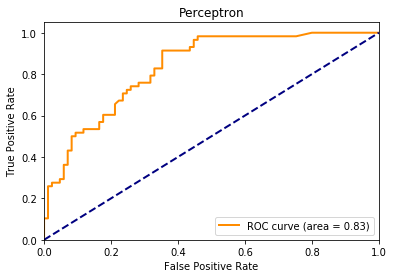

In [24]:
# rodando o classificador: Perceptron
clf = CalibratedClassifierCV(prcp, cv=10, method='isotonic')
clf.fit(X=train, y=train.iloc[:, 0])
# rótulos verdadeiros convertidos para array
y_test = np.array(test.iloc[:, 0])

y_score = clf.predict_proba(test)

print(y_score)

fpr, tpr, _ = roc_curve(y_score=y_score[:, 1], y_true=y_test)
roc_auc = auc(fpr, tpr)
print("ROC AUC: ", str(roc_auc))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc, lw=lw)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perceptron')
plt.legend(loc="lower right")
plt.show()

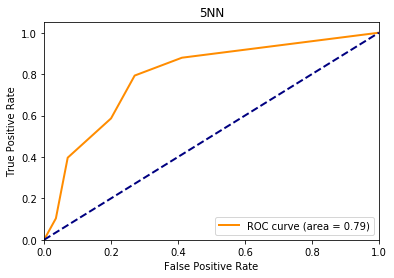

ROC AUC:  0.793711967545639


In [31]:
# rodando o classificador: KNN
clf = _5nn.fit(X=train, y=train.iloc[:, 0])
# rótulos verdadeiros convertidos para array
y_test = np.array(test.iloc[:, 0])

y_score = clf.predict_proba(test)

fpr, tpr, _ = roc_curve(y_score=y_score[:, 1], y_true=y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc, lw=lw)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('5NN')
plt.legend(loc="lower right")
plt.show()
print("ROC AUC: ", str(roc_auc))

### Questão 3)

Explique o desempenho dos classificadores que você treinou na questão anterior pela curva ROC. Como a AUC sintetiza a curva ROC e como podemos utilizá-la para comparar classificadores?

O desempenho do Perceptron foi melhor pela curva ROC, porém pelas medidades de desempenho vistas anteriormente ele foi o pior. 